In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import numpy as np 
import pandas as pd 
import itertools
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline

import os
import itertools
plt.style.use('fivethirtyeight') 

from pylab import rcParams
import statsmodels.api as sm
from numpy.random import normal, seed
from scipy.stats import norm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARMA, ARIMA
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt, ExponentialSmoothing
import math
from sklearn.metrics import mean_squared_error
from random import random
import datetime

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/DataAir.csv")
#data2=pd.read_csv("/content/drive/MyDrive/DataAirTrain2.csv")
data = data.drop(data.columns[0], axis=1)
#data = pd.concat([data, data2['time']], axis=1)
data.head(10)

Barometer   Temp     NO  PM-10     RH  Radiation  WindDir    SO2     NOx  \
0    1010.28  25.55  18.57  18.12  98.55       0.01   188.88  19.17  68.232   
1    1011.21  25.17  11.61  17.25  99.62      32.83   194.24  13.49  48.492   
2    1012.36  25.86   8.79  12.04  97.46     311.73   108.60   6.68  30.564   
3    1012.66  27.67  11.33  10.91  88.45     532.91   119.74   5.77  30.996   
4    1012.78  29.14   5.50   8.91  77.99     610.51   116.88   5.72  23.676   
5    1011.23  29.41  13.53  12.03  78.18     343.47   119.90   8.68  47.448   
6    1009.65  28.91   7.02  13.06  81.86     124.37   124.78   9.71  41.784   
7    1009.69  28.87   4.49  10.76  83.69     254.85   138.83   6.47  16.872   
8    1009.71  28.83   4.67  12.42  84.64     209.75   136.05   3.11  12.240   
9    1008.63  28.51   4.06  14.29  85.59      79.30   124.73   1.88  14.172   

     NO2  ...      CO  PM-1     O3  Wind Spd    TSP                 time  \
0  78.45  ...  461.82  3.43 -17.17      1.48  31.02  2019-04-14 07:00:00   
1  58.17  ...  595.40  3.43  -3.70      1.55  31.13  2019-04-14 08:00:00   
2  34.38  ...  553.42  2.43   3.09      1.24  21.29  2019-04-14 09:00:00   
3  31.16  ...  446.55  2.14   8.60      1.78  19.24  2019-04-14 10:00:00   
4  28.68  ...  435.10  1.87  33.08      1.56  18.48  2019-04-14 11:00:00   
5  53.60  ...  408.38  2.49  14.88      1.40  23.25  2019-04-14 12:00:00   
6  54.71  ...  450.37  2.60   6.70      1.61  27.16  2019-04-14 13:00:00   
7  19.55  ...  362.58  2.18   7.36      2.65  21.91  2019-04-14 14:00:00   
8  12.02  ...  301.52  2.07   3.21      2.26  24.97  2019-04-14 15:00:00   
9  15.98  ...  343.50  1.99  -0.35      1.45  29.58  2019-04-14 16:00:00   

      WinDir1      Temp1         ASKQ  Wind Spd (sai)  
0  124.553489  26.570572  1004.557967        0.780691  
1  134.956598  26.069825  1004.730840        0.779759  
2  141.069288  26.552454  1004.515630        0.985526  
3  138.287399  28.677137  1003.877532        1.365120  
4  137.280406  30.667563  1003.175303        1.724824  
5  124.279581  30.847159  1002.982009        1.592629  
6  126.644499  29.777010  1003.425952        1.431936  
7  141.131719  29.499672  1003.841335        1.615800  
8  145.955810  29.372801  1003.823366        1.600891  
9  146.431080  29.059004  1003.756540        1.471999  

[10 rows x 22 columns]

<AxesSubplot:>

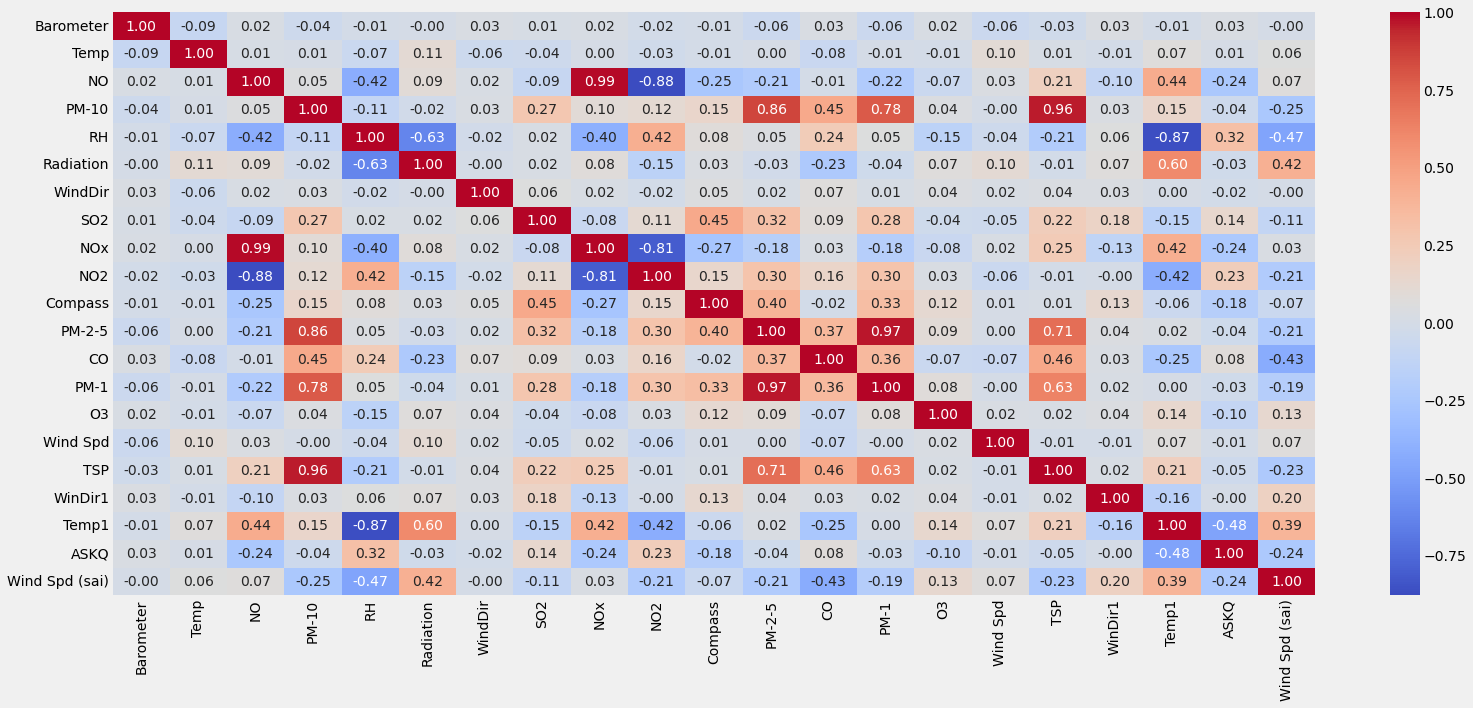

In [ ]:
plt.figure(figsize=(24, 10))
sns.heatmap(data.corr(), annot= True, cmap='coolwarm', fmt = '.2f')

In [ ]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(series, signif=0.05, name='', verbose=False):
    

    result = adfuller(series.values)
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")

In [ ]:
df = data.set_index('time')
for name, column in df.iteritems():
    check_stationarity(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Barometer" 
    -----------------------------------------------
ADF Statistic: -6.398442
p-value: 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Stationary


    Augmented Dickey-Fuller Test on "Temp" 
    -----------------------------------------------
ADF Statistic: -6.701999
p-value: 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Stationary


    Augmented Dickey-Fuller Test on "NO" 
    -----------------------------------------------
ADF Statistic: -5.314906
p-value: 0.000005
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Stationary


    Augmented Dickey-Fuller Test on "PM-10" 
    -----------------------------------------------
ADF Statistic: -6.154773
p-value: 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Stationary


    Augmented Dickey-Fuller Test on "RH" 
    -----------------------------------------------
ADF Statistic: -5.743048
p-value: 0.000001
Critical Values:
	1%: -3.432
	5%: -

In [ ]:
train_data = data[['Barometer', 'Temp', 'NO',	'PM-10',	'RH',	'Radiation',	'WindDir',	'SO2',	'NOx',	'NO2',	'Compass',	'PM-2-5',	'CO',	'PM-1',	'O3',	'Wind Spd',	'TSP',
                   'WinDir1',	'Temp1',	'ASKQ',	'Wind Spd (sai)']]
model = sm.tsa.VARMAX(train_data,order=(2,1),trend='c')
model_fitted = model.fit(maxiter=1000,disp=False)
model_fitted.save('var.h5')
#print(model_fitted.summary())

The mse is Barometer 1031.6635015800691.
The mse is Temp 1031.6635015800691.
The mse is NO 1031.6635015800691.
The mse is PM-10 1031.6635015800691.
The mse is RH 1031.6635015800691.
The mse is Radiation 1031.6635015800691.
The mse is WindDir 1031.6635015800691.
The mse is SO2 1031.6635015800691.
The mse is NOx 1031.6635015800691.
The mse is NO2 1031.6635015800691.
The mse is Compass 1031.6635015800691.
The mse is PM-2-5 1031.6635015800691.
The mse is CO 1031.6635015800691.
The mse is PM-1 1031.6635015800691.
The mse is O3 1031.6635015800691.
The mse is Wind Spd 1031.6635015800691.
The mse is TSP 1031.6635015800691.
The mse is WinDir1 1031.6635015800691.
The mse is Temp1 1031.6635015800691.
The mse is ASKQ 1031.6635015800691.
The mse is Wind Spd (sai) 1031.6635015800691.


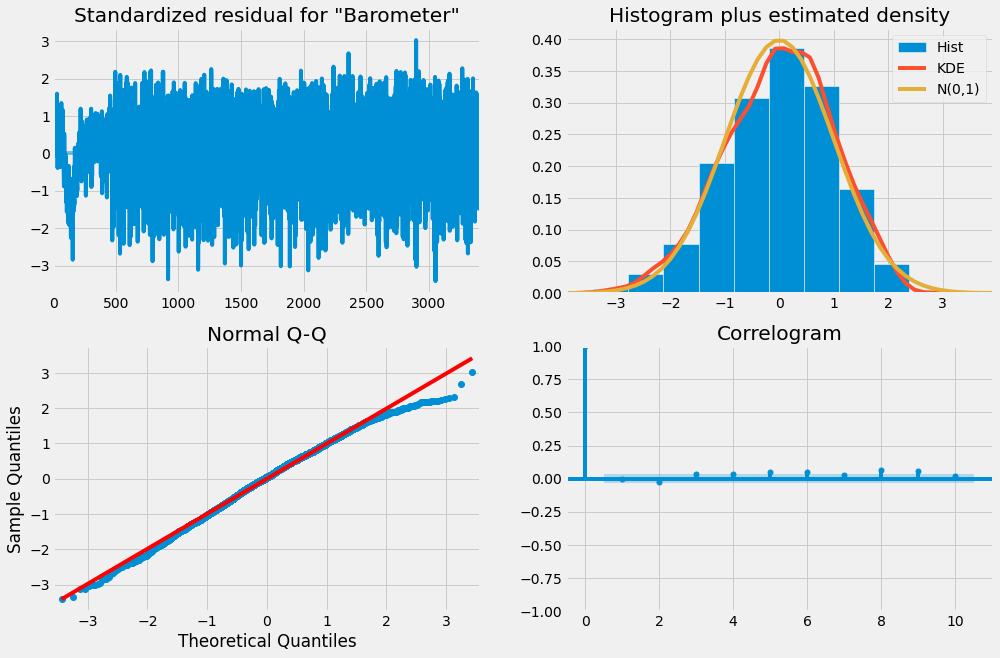

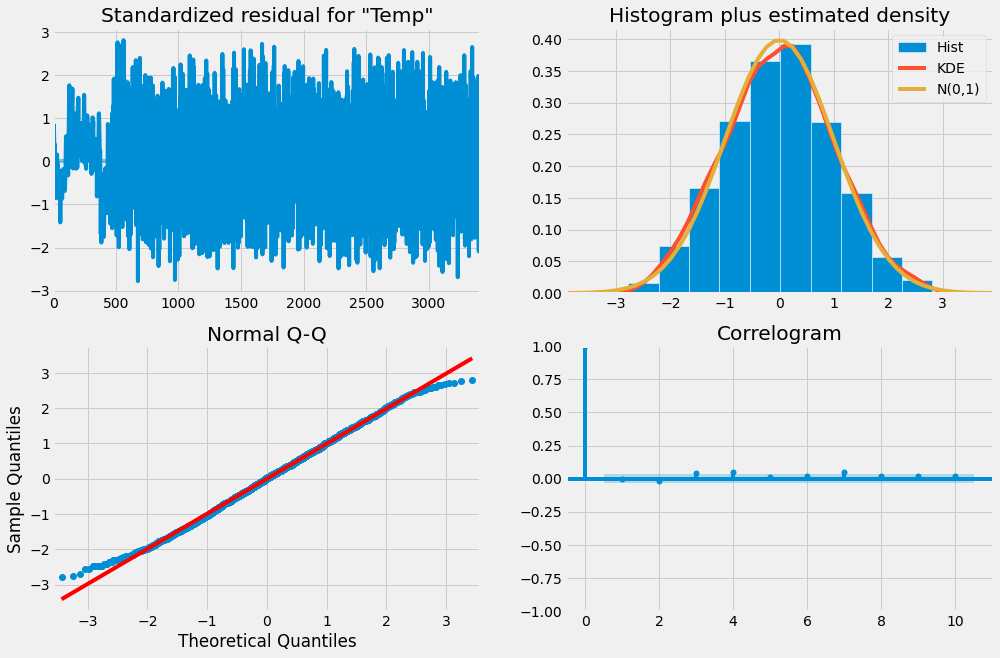

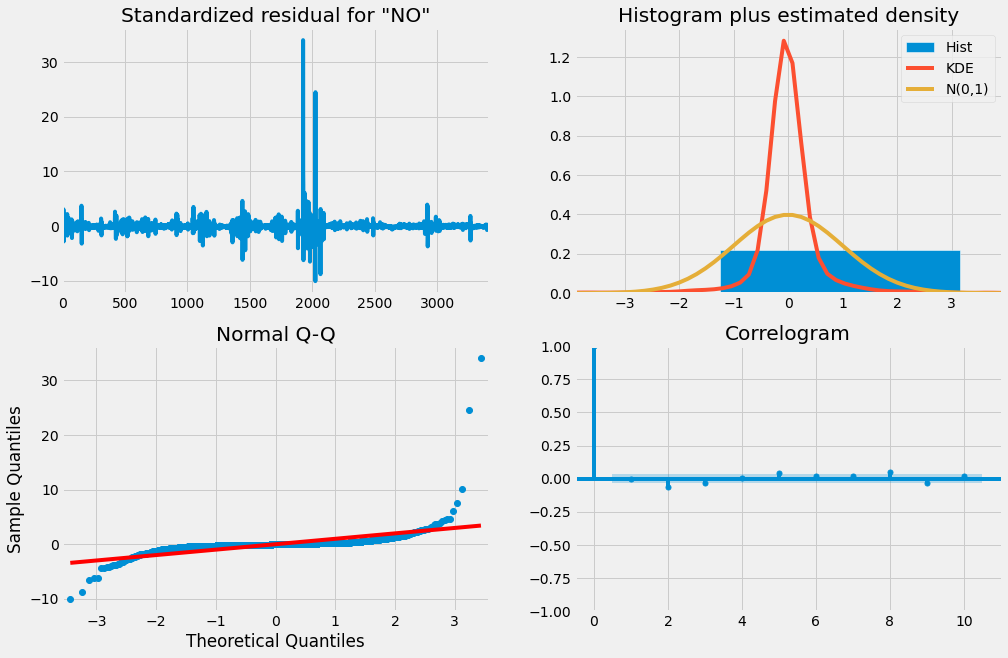

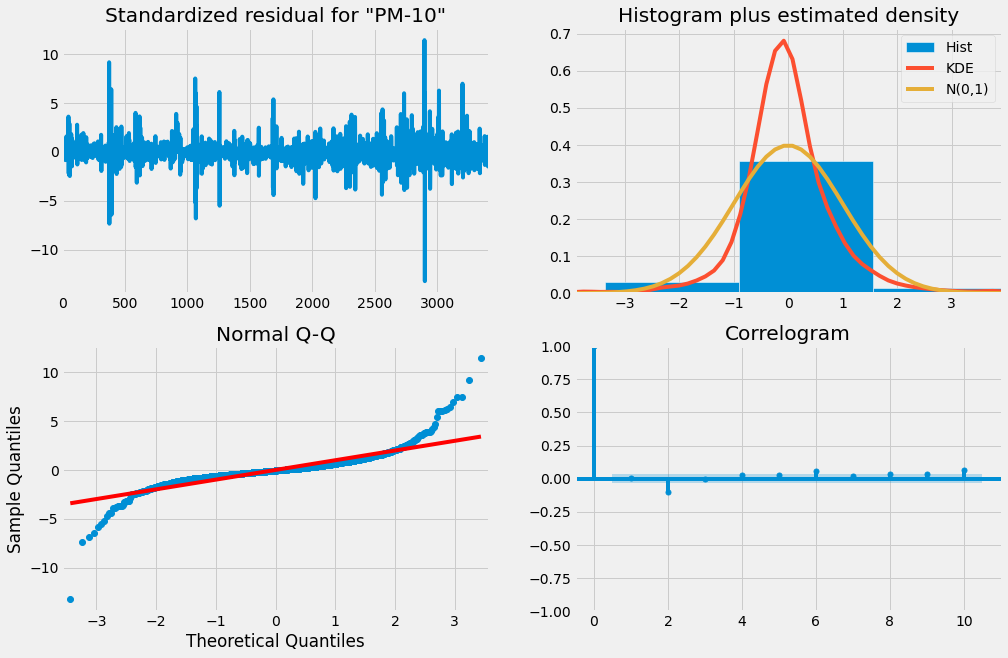

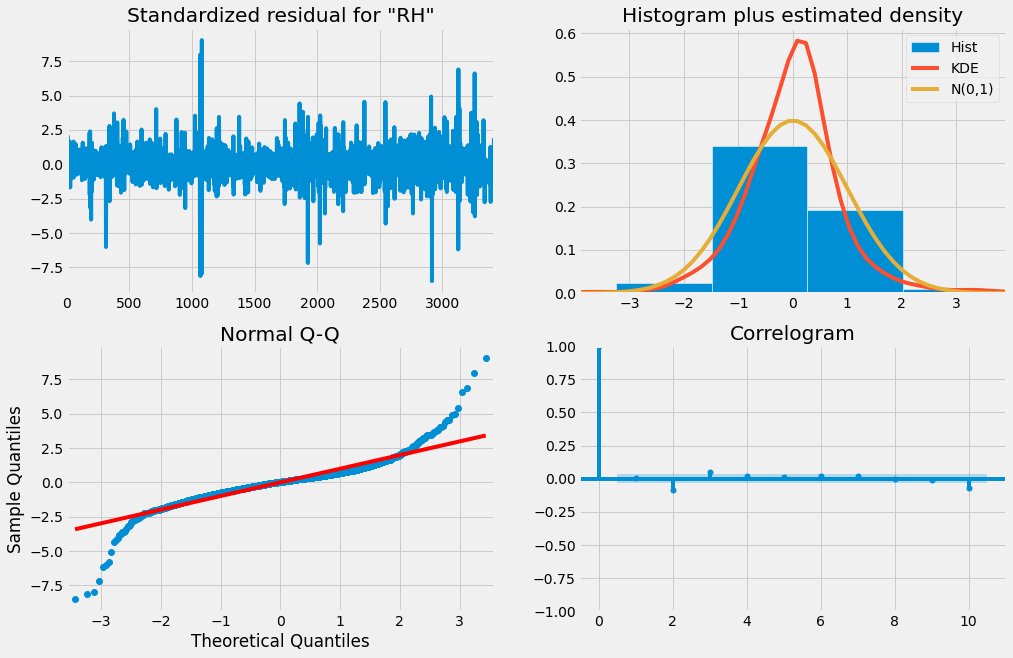

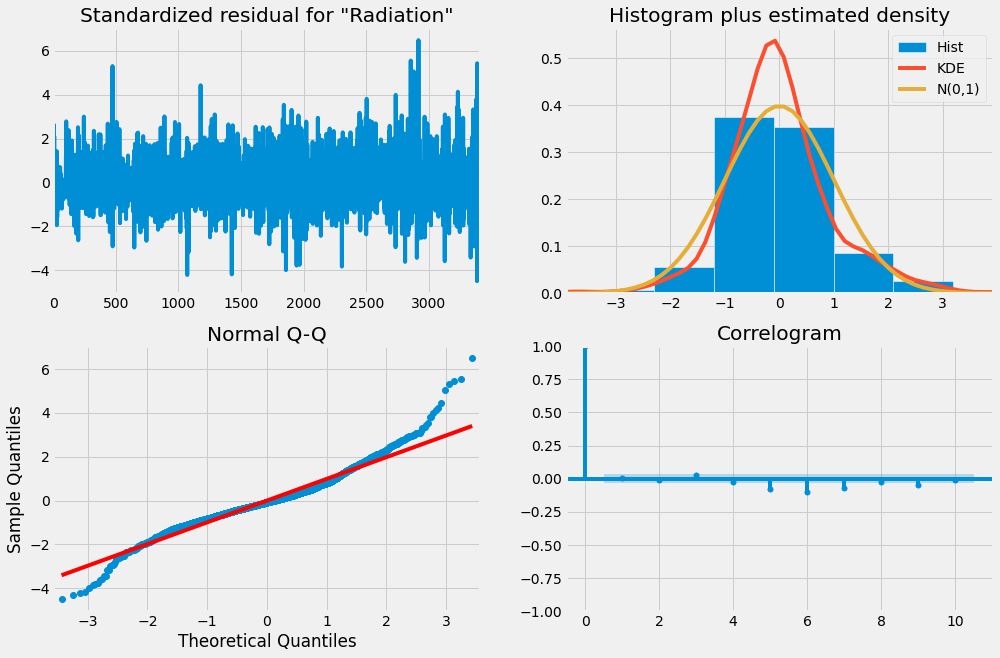

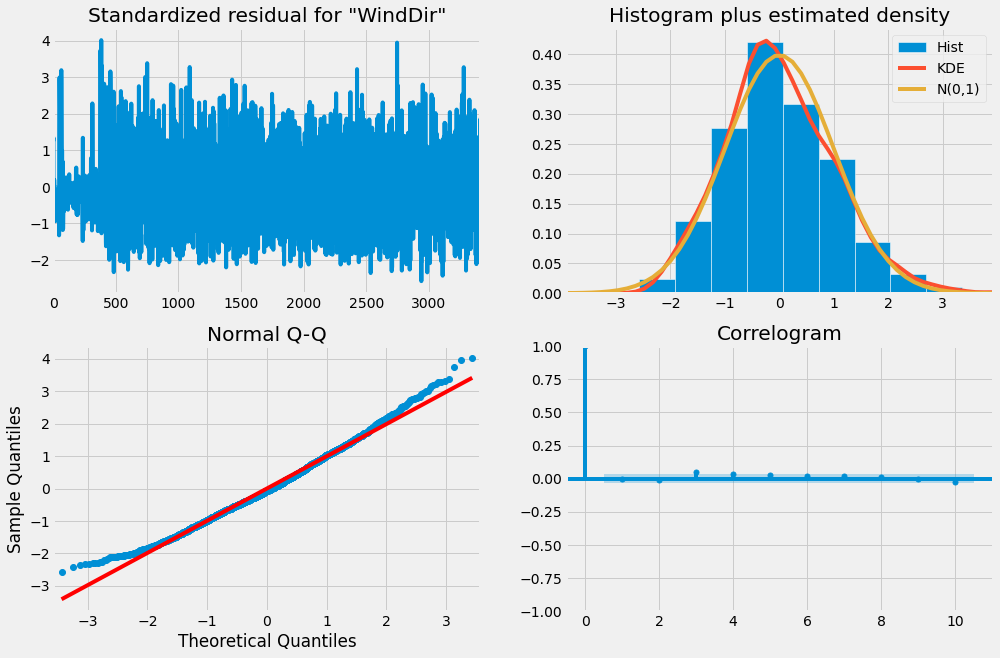

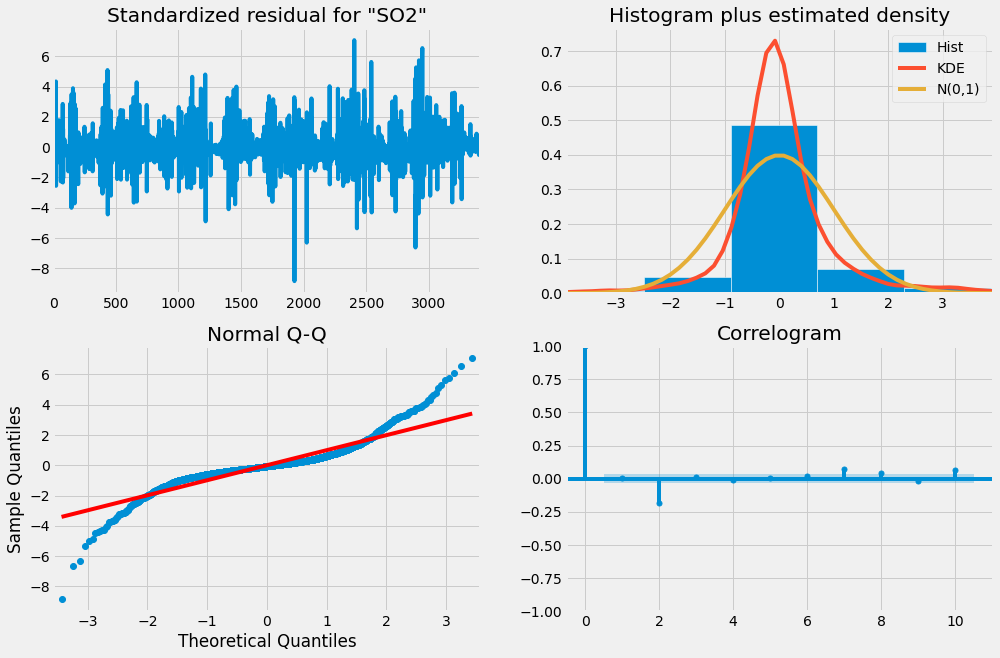

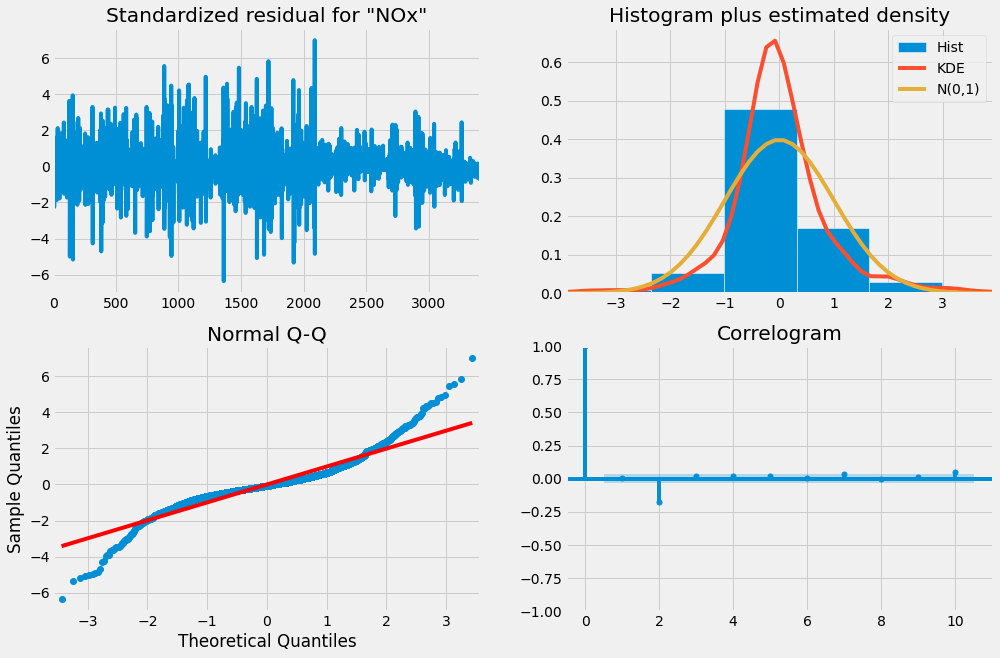

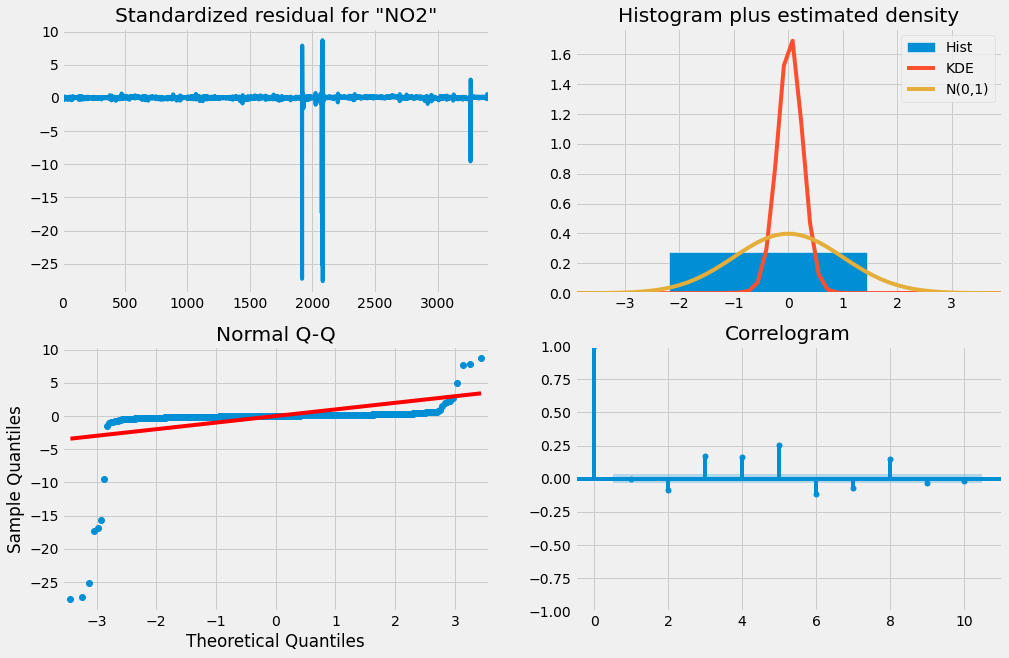

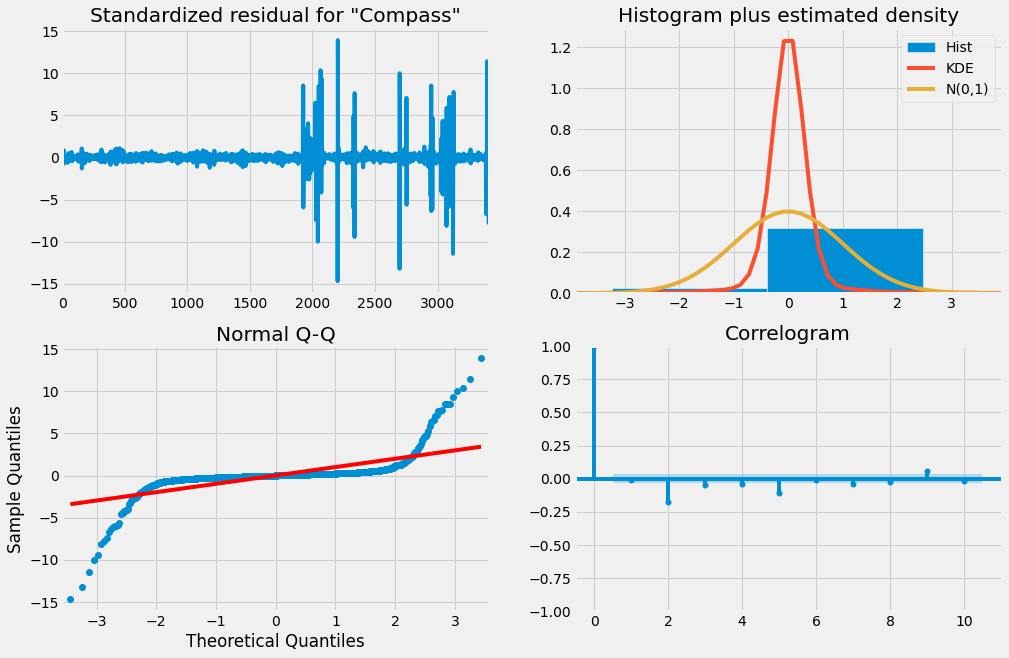

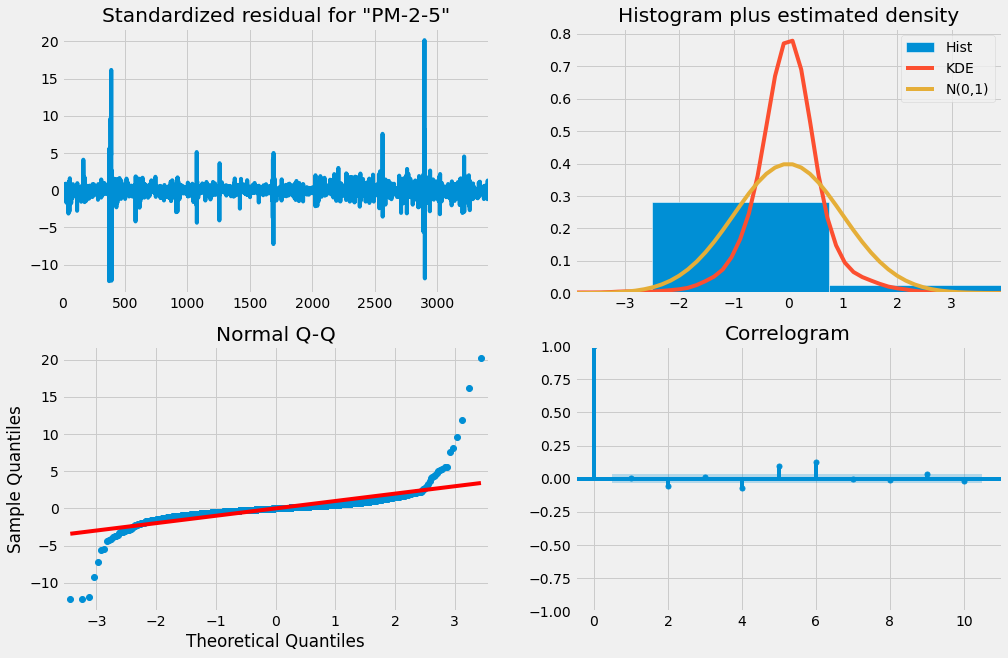

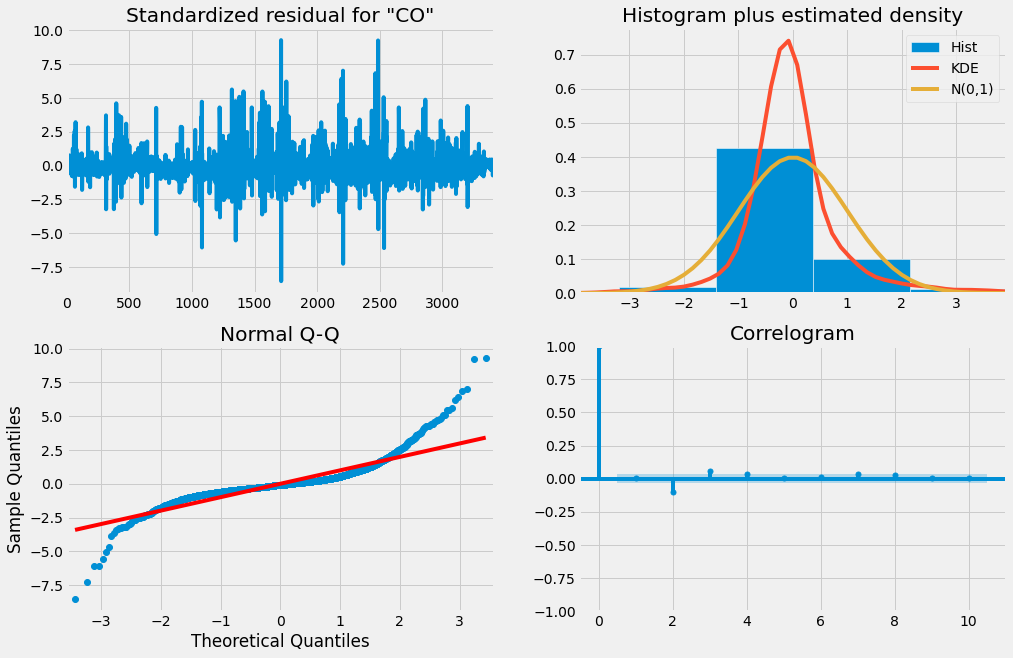

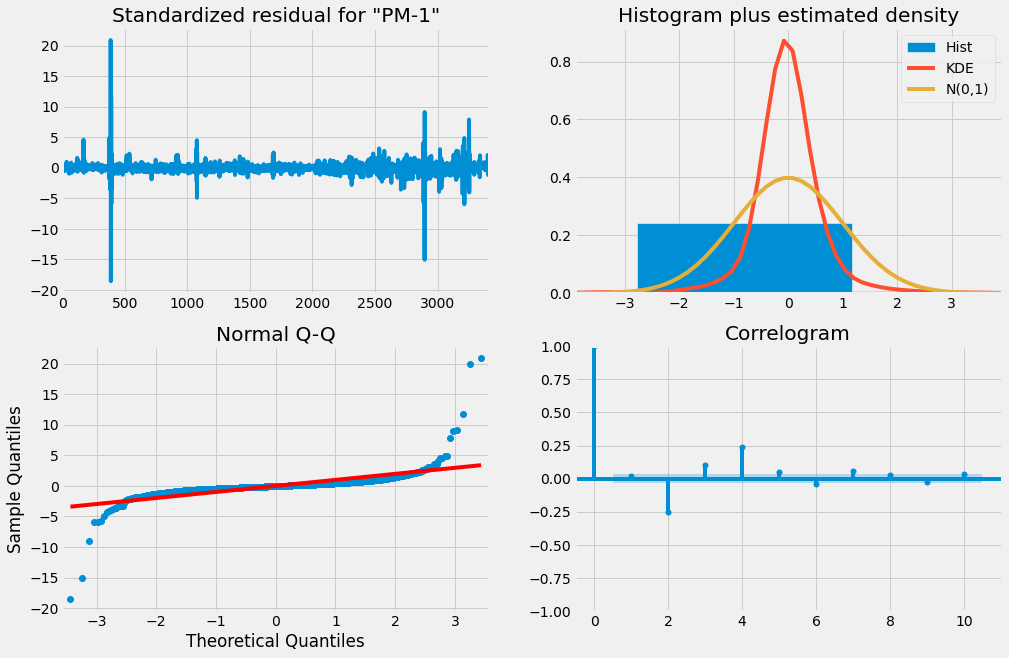

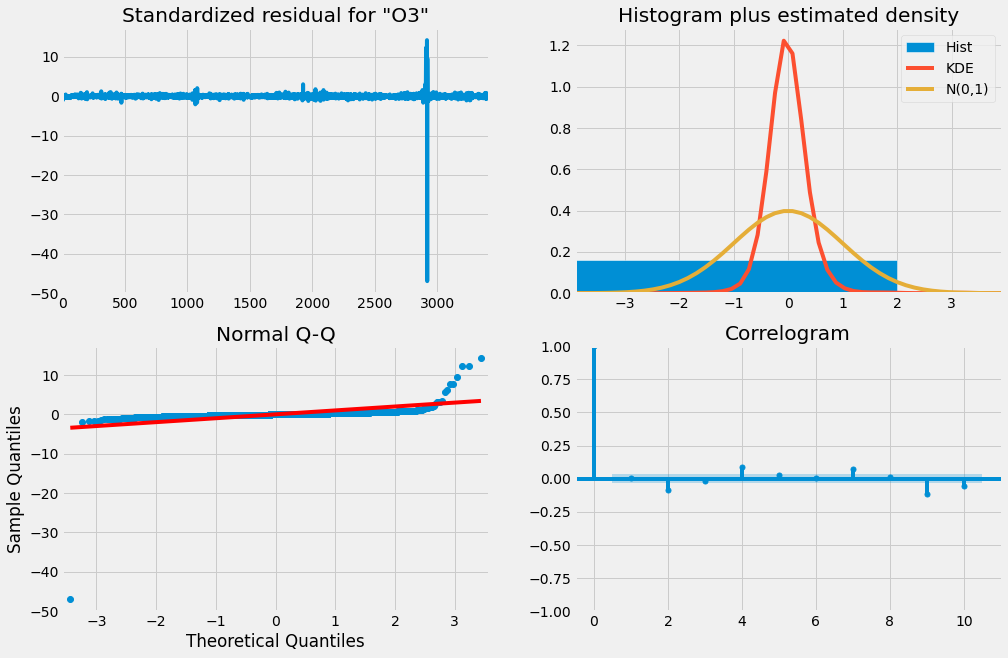

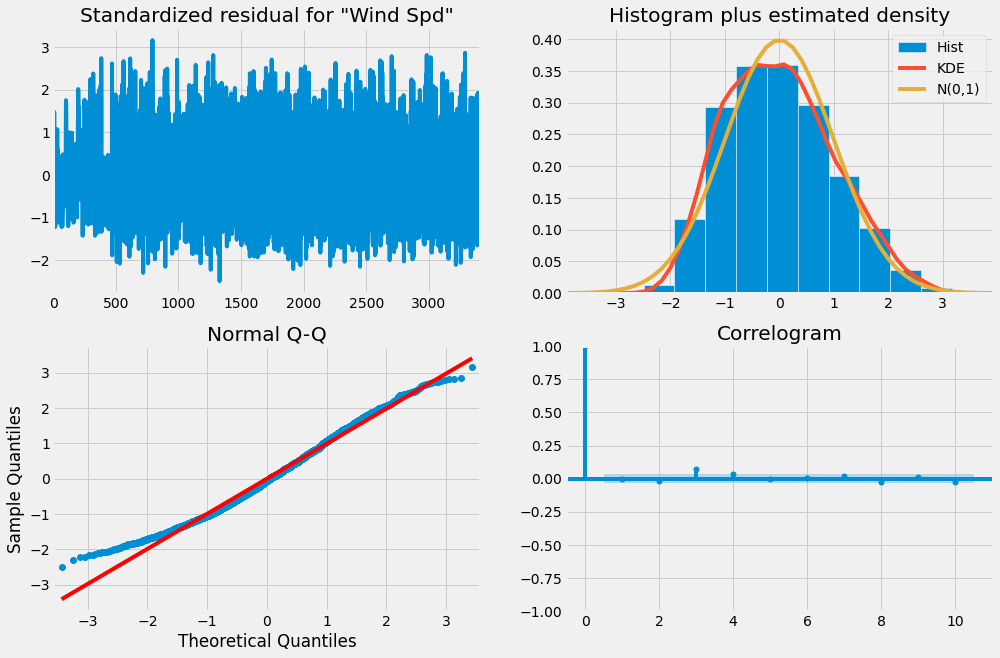

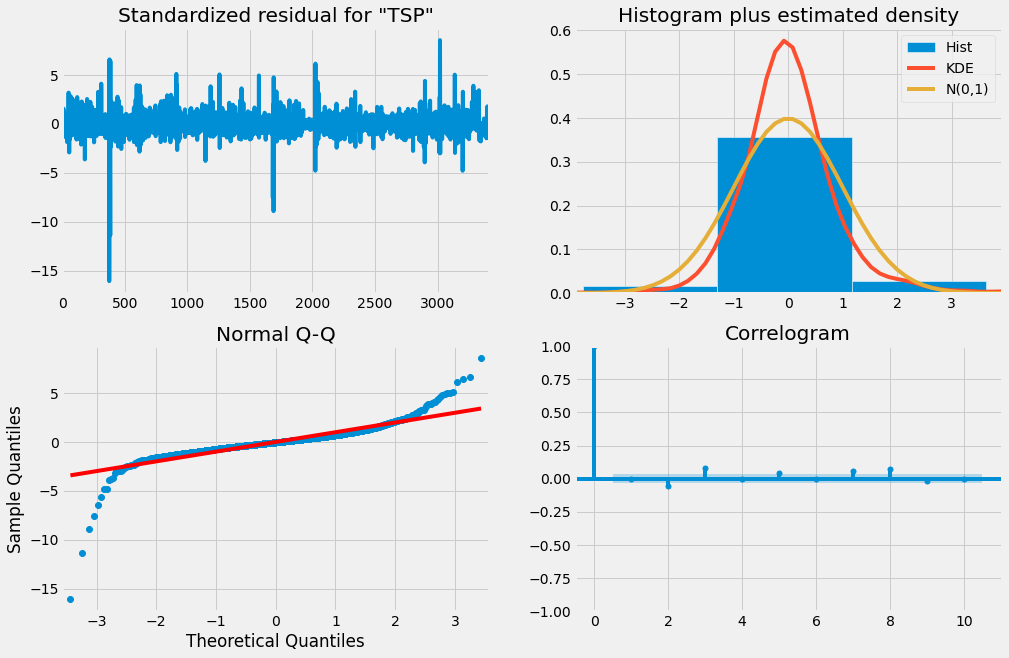

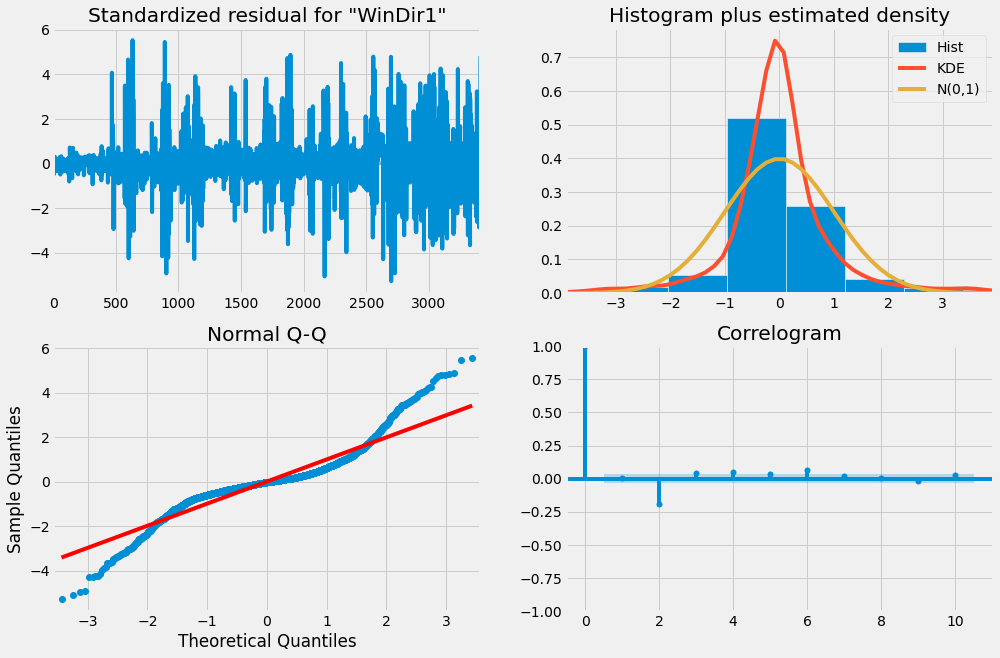

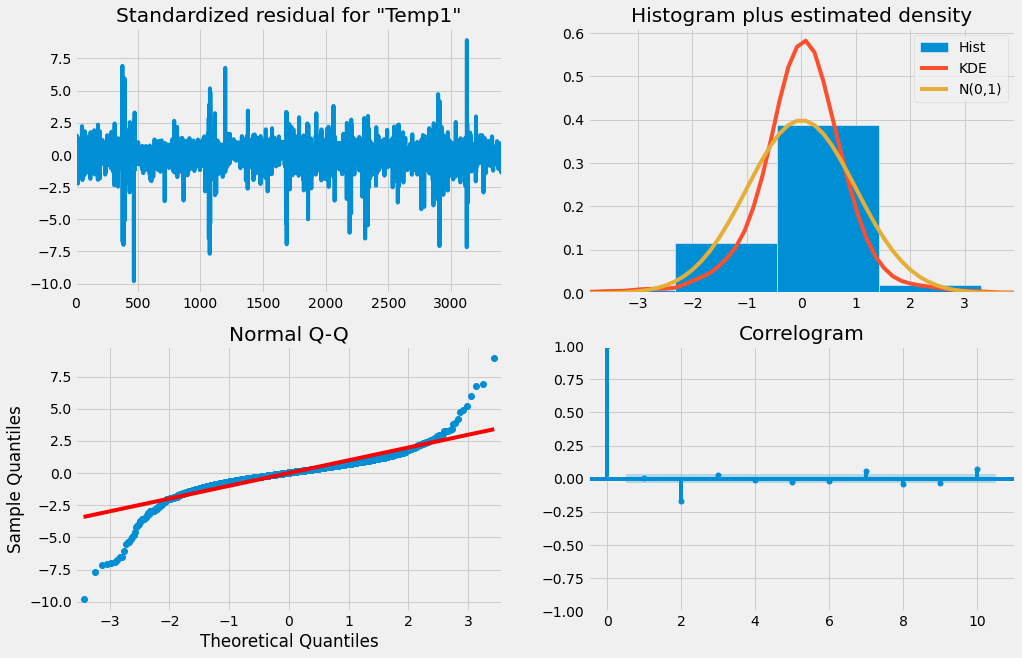

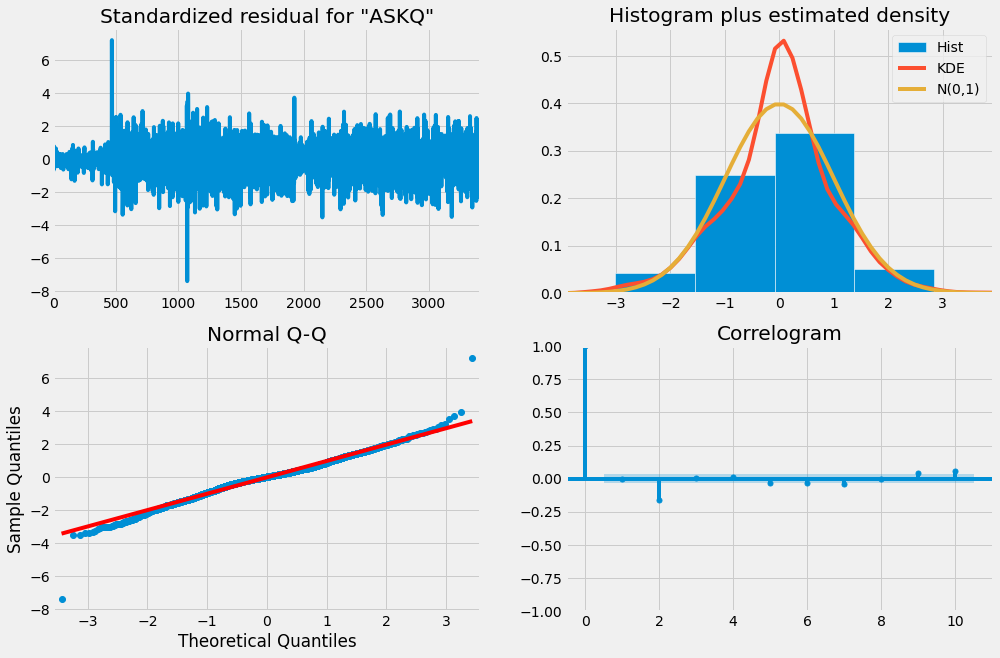

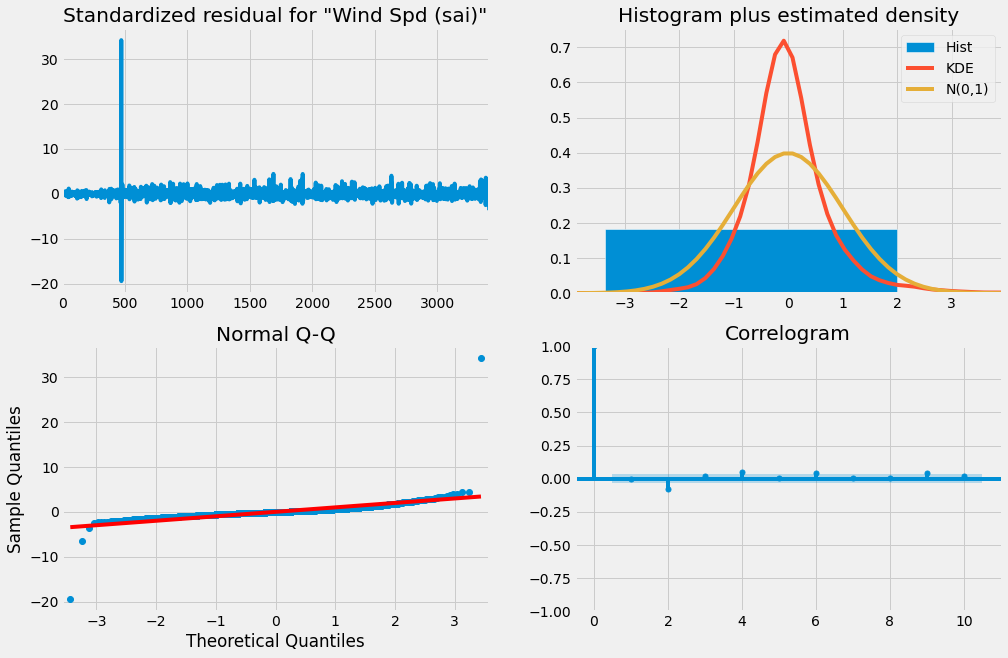

In [ ]:
predicted_result = model_fitted.predict(start=3300, end=3413)

values = train_data.iloc[3300:3414].values
values1 =  predicted_result.values

groups = ['Barometer', 'Temp', 'NO',	'PM-10',	'RH',	'Radiation',	'WindDir',	'SO2',	'NOx',	'NO2',	'Compass',	'PM-2-5',	'CO',	'PM-1',	'O3',	'Wind Spd',	'TSP',
          'WinDir1',	'Temp1',	'ASKQ',	'Wind Spd (sai)']
i = 0
# plot each column
#plt.figure(figsize=(10,100))
for group in groups:
    model_fitted.plot_diagnostics(variable=i,figsize=(15,10))
    # calculating error
    error = mean_squared_error(train_data.iloc[3300:3414].values, predicted_result.values)
    print("The mse is {}.".format(error))
    i+=1

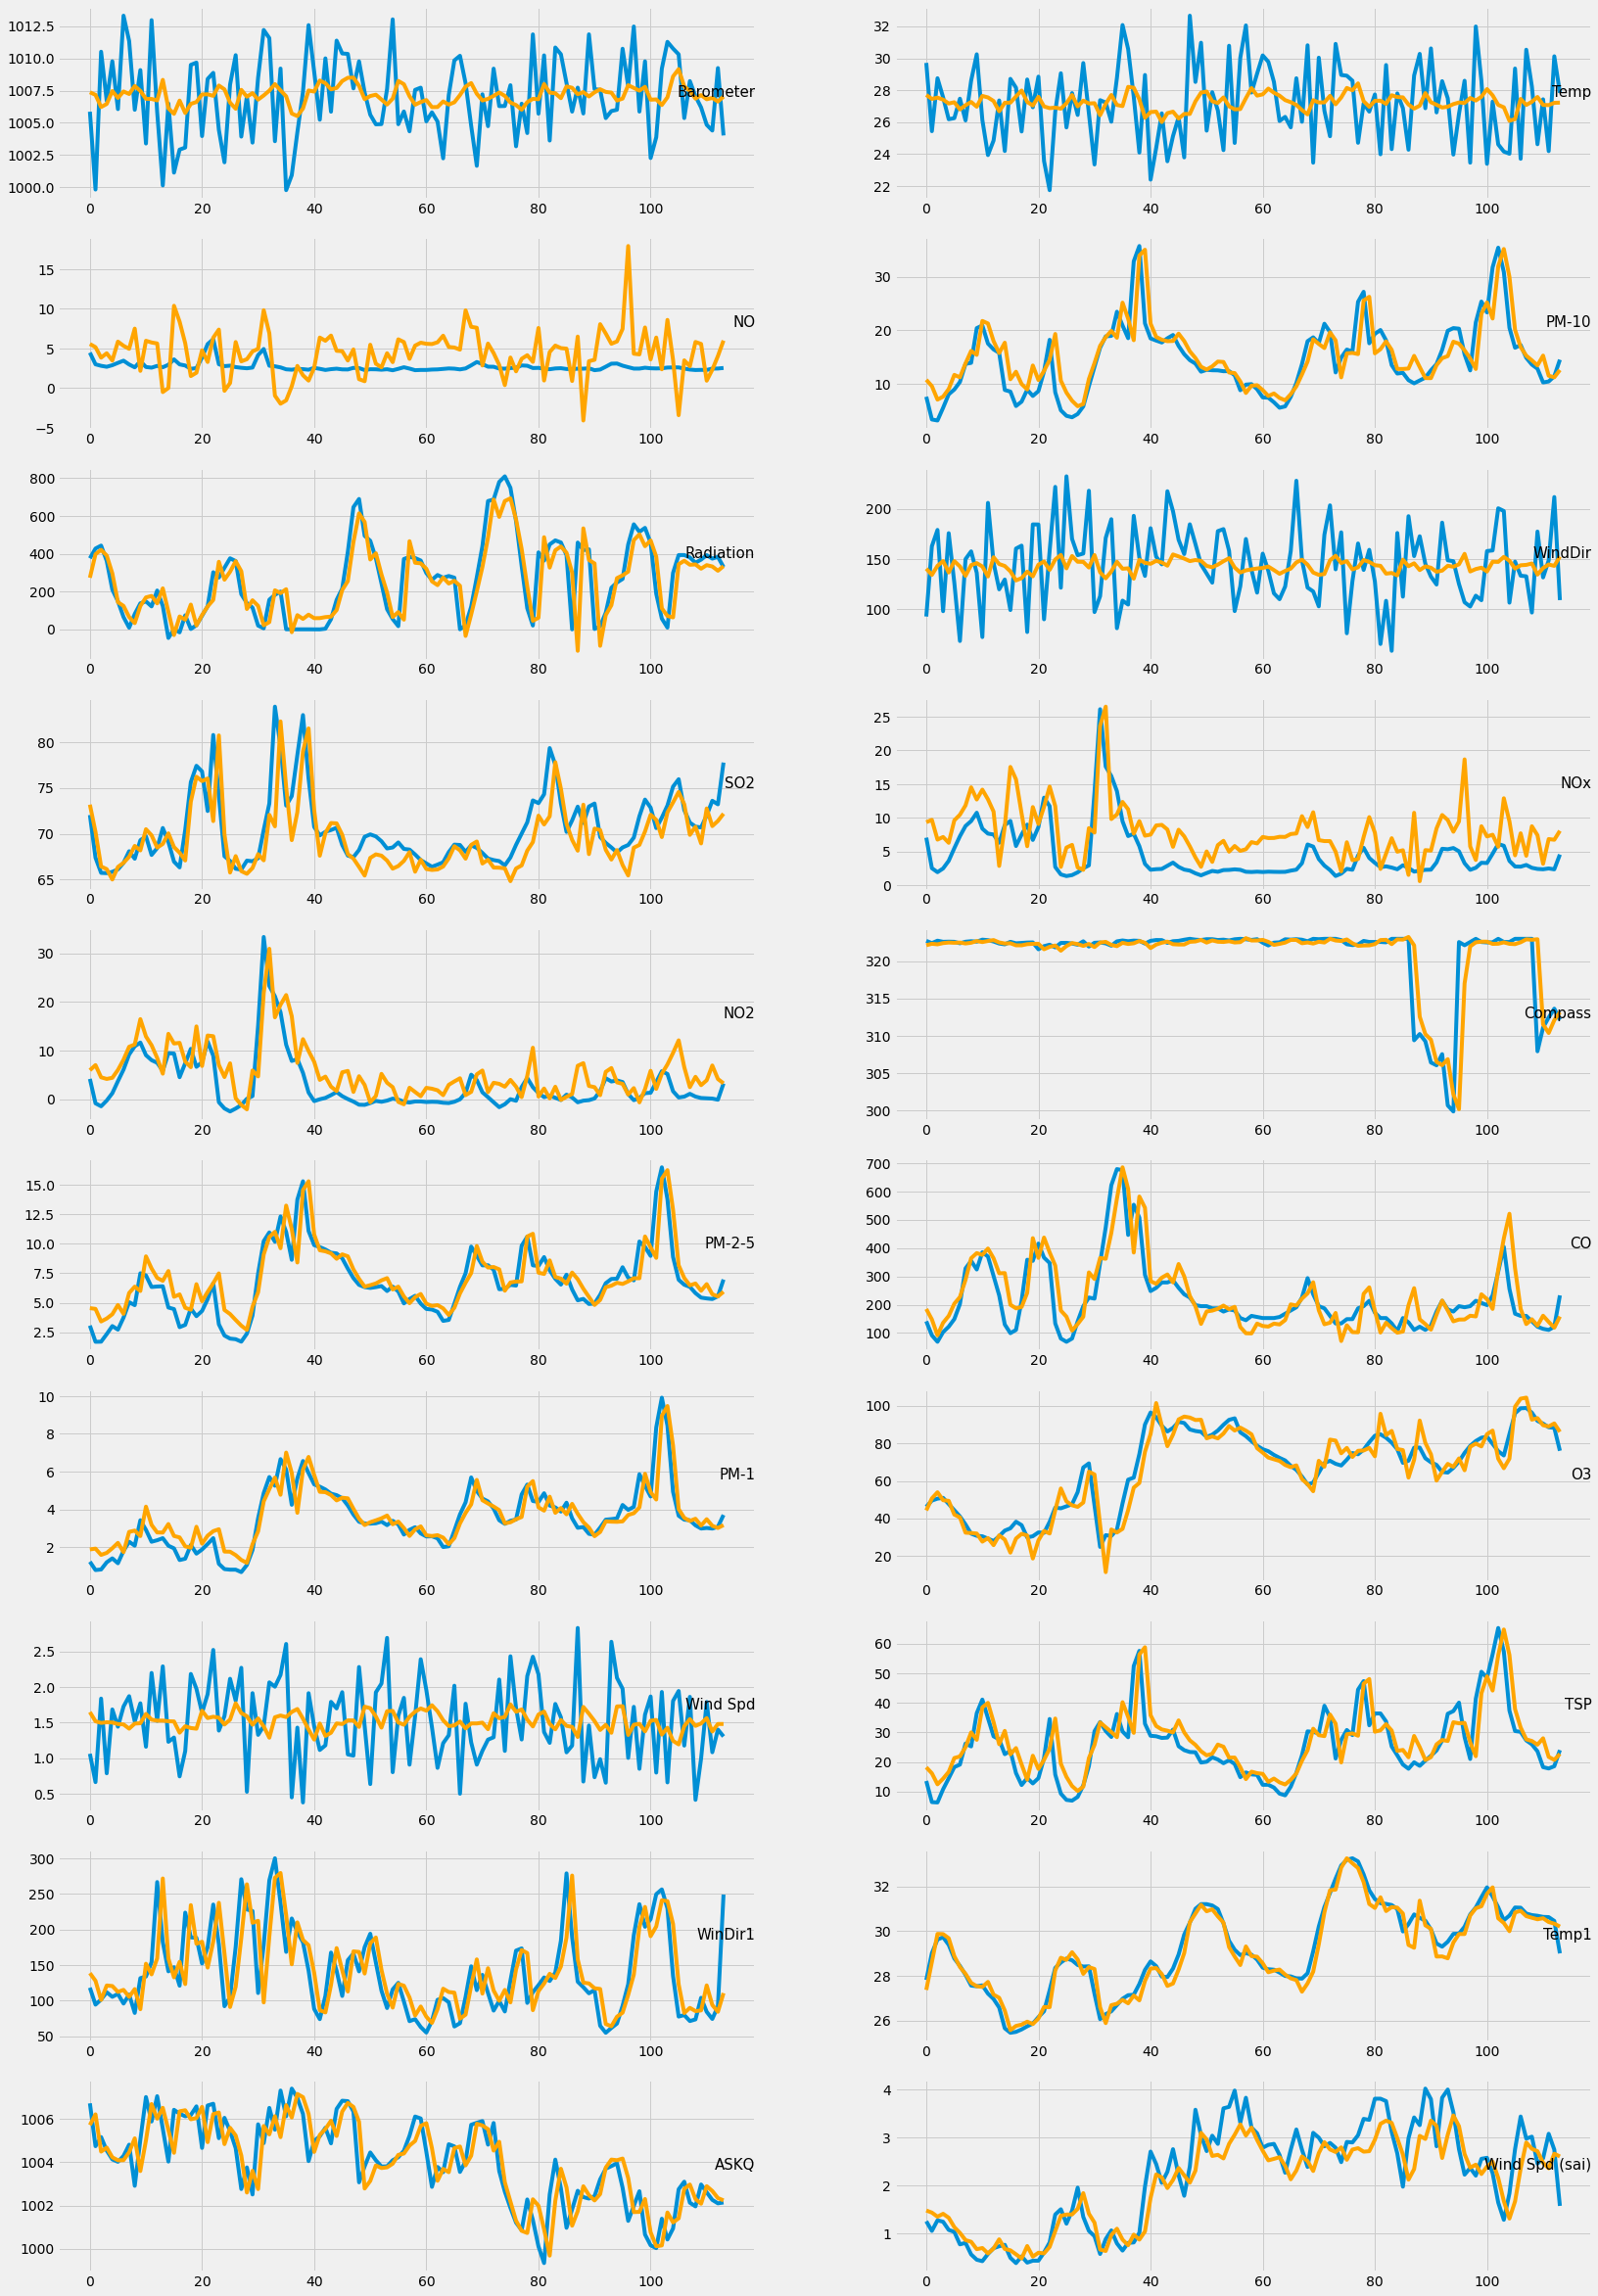

In [ ]:
from pandas import read_csv
from matplotlib import pyplot as plt
# load dataset

values = train_data.iloc[3300:3414].values
values1 =  predicted_result.values
# specify columns to plot
groups = [0,1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13,14,15,16, 17, 18, 19,20]
i = 1
# plot each column
plt.figure(figsize=(25,80))
for group in groups:
    plt.subplot(len(groups), 2, i)
    plt.plot(values[:, group])
    plt.plot(values1[:, group], c = "orange")
    plt.title(train_data.columns[group], y=0.5, loc='right', fontsize = 15)
    i += 1
plt.show()

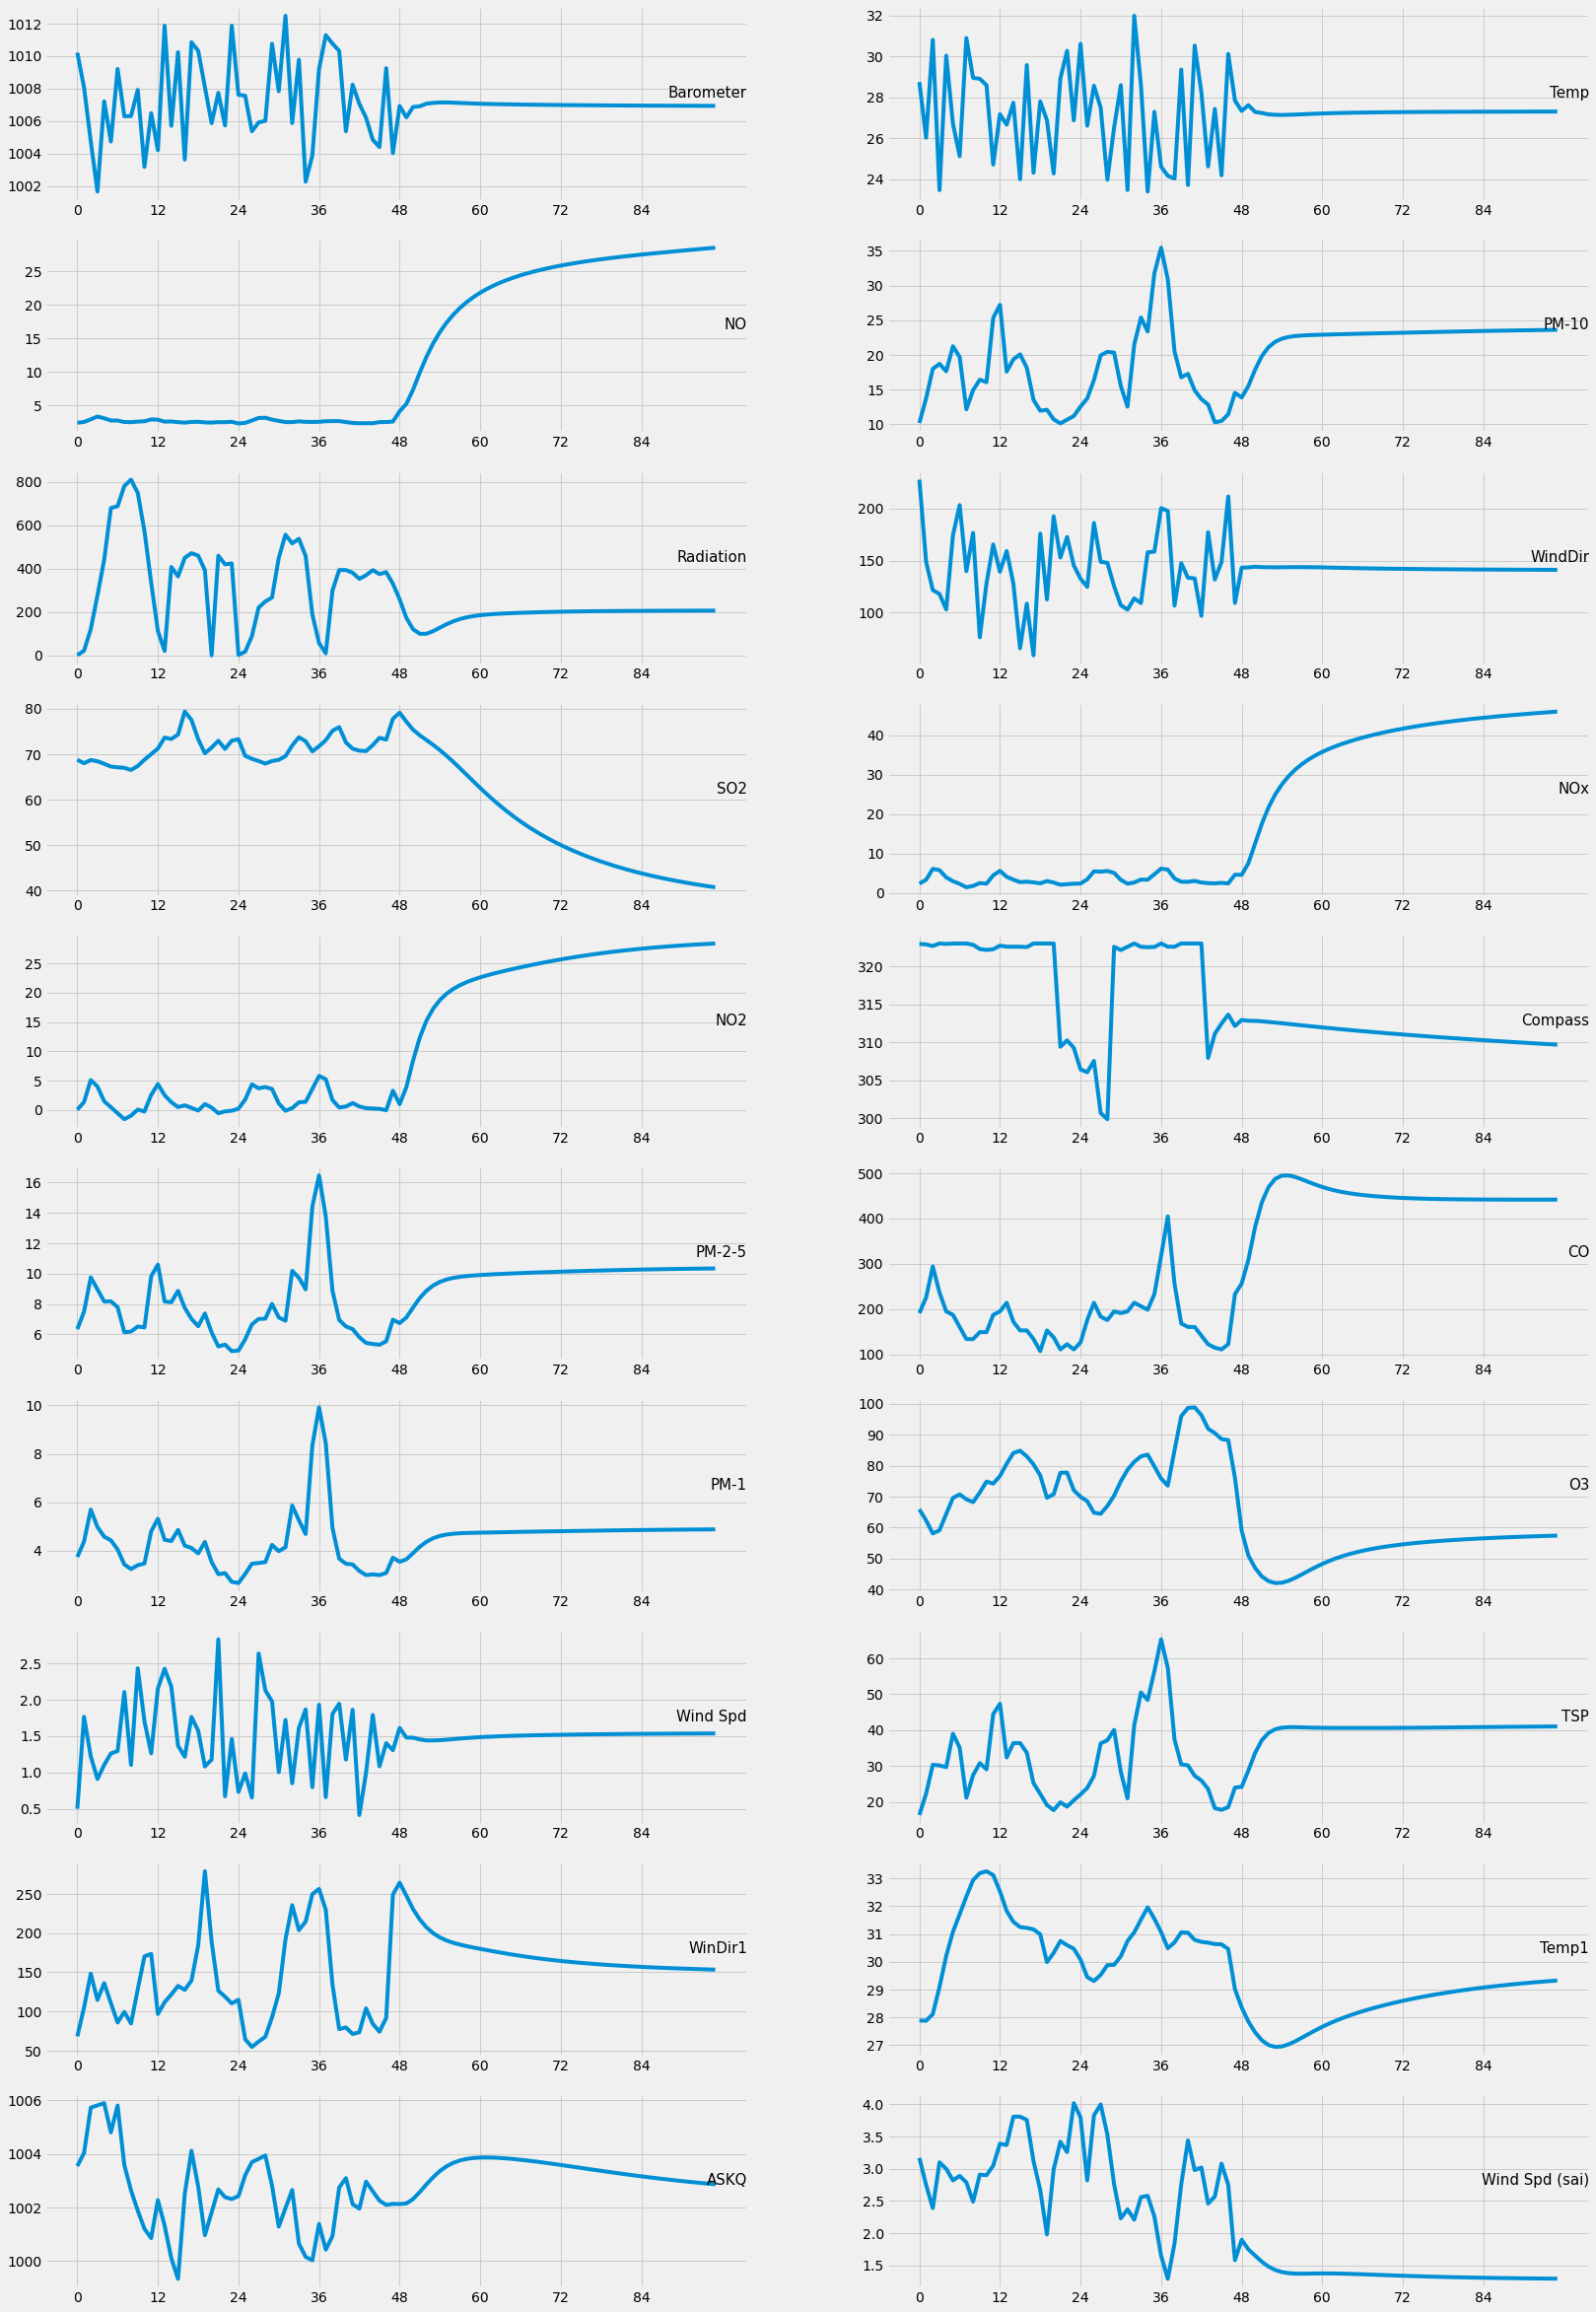

In [ ]:
predicted_48h_result = model_fitted.predict(start=3414, end=3414 + 48)

data1 = data.append(predicted_48h_result)
values = data1.iloc[3366:3462].values

groups = [0,1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13,14,15,16, 18, 19,20,21]
i = 1
# plot each column
plt.figure(figsize=(25,80))
for group in groups:
    plt.subplot(len(groups), 2, i)
    plt.plot(values[:, group])
    plt.xticks(range(0,96,12))
    plt.title(data.columns[group], y=0.5, loc='right', fontsize = 15)
    i += 1
plt.show()